In [156]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [164]:
from keras.datasets import mnist
import numpy as np

(x_train, ytr), (x_test, yts) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print(x_test.shape[0])

x_train = x_train.reshape((x_train.shape[0],-1))
x_test = x_test.reshape((x_test.shape[0],-1))

10000


In [165]:
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [166]:
x_train_noisy.shape

(60000, 784)

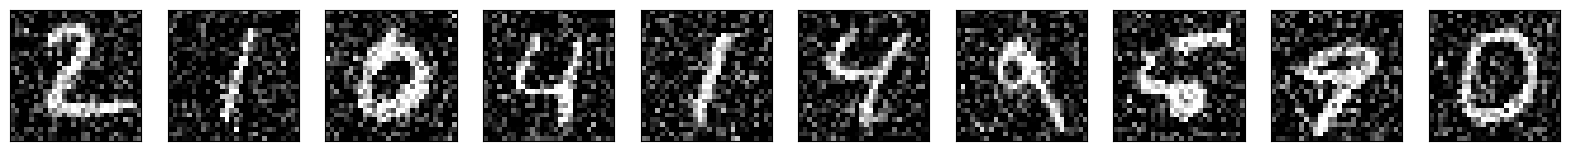

In [143]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [170]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

# This is the size of our encoded representations
encoding_dim = 100 

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)
# This model maps an input to its encoded representation
#encoder = keras.Model(input_img, encoded)

#encoded_input = keras.Input(shape=(encoding_dim,))
#decoder_layer = autoencoder.layers[-1]
#decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_split=0.2,
                )

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0967 - val_loss: 0.0297
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0266 - val_loss: 0.0187
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0174 - val_loss: 0.0135
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0126 - val_loss: 0.0103
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0097 - val_loss: 0.0083
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0078 - val_loss: 0.0068
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0064 - val_loss: 0.0057
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0055 - val_loss: 0.0050
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048 - val_loss: 0.0045
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [168]:
prediction = autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step


In [98]:
array_random = np.random.rand(1,784)

# Stampiamo il risultato
print(array_random)

[[7.92676567e-01 6.27069446e-01 1.37736777e-01 5.86773569e-01
  7.40871206e-01 9.10472524e-02 3.45065591e-01 7.61367552e-01
  2.69541082e-01 1.10692026e-01 1.22392009e-01 5.28635593e-01
  6.87780062e-02 5.66258665e-01 9.29595682e-01 1.58735723e-01
  8.49341152e-01 8.66183033e-01 3.43942815e-01 5.27522797e-01
  1.18702619e-02 9.74625652e-01 2.39793337e-02 3.34128355e-01
  2.73049289e-01 5.24988855e-01 7.73860535e-01 7.37025949e-01
  5.41923062e-01 7.91342262e-01 4.62832148e-01 2.26280515e-01
  3.41772381e-01 8.92750305e-01 7.37735514e-01 3.46680840e-01
  7.82754095e-01 5.15800280e-01 8.56864895e-01 7.08509107e-01
  8.65513437e-02 4.14641828e-01 7.54952884e-01 4.33470377e-01
  1.83795464e-01 5.00766249e-01 5.89640191e-01 4.45775675e-01
  9.32420207e-02 5.87564693e-01 2.68920545e-01 8.16124471e-01
  9.56517896e-01 5.32775479e-02 4.54322709e-01 5.84513486e-01
  5.28541731e-01 7.25278196e-01 1.15653962e-01 3.59609166e-01
  9.51429680e-01 3.45575601e-01 2.89252596e-01 6.73142944e-01
  9.3187

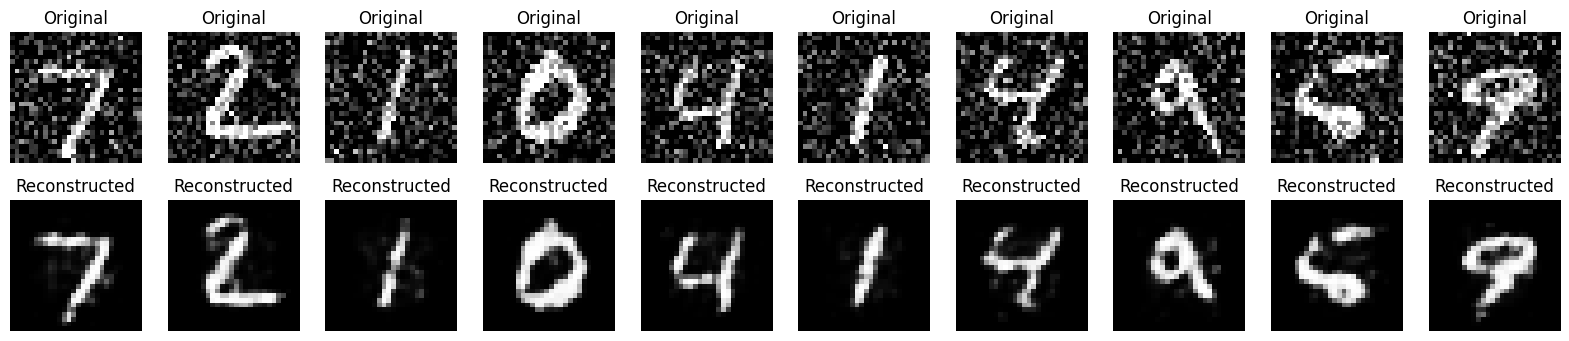

In [171]:
num_images = 10
plt.figure(figsize=(20, 4))

for i in range(num_images):
    # Immagine originale
    plt.subplot(2, num_images, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28),cmap="gray")
    plt.title('Original')
    plt.axis('off')
    
    # Immagine ricostruita
    plt.subplot(2, num_images, num_images + i + 1)
    plt.imshow(prediction[i].reshape(28, 28),cmap="gray")
    plt.title('Reconstructed')
    plt.axis('off')

plt.show()


In [ ]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(second_layer_output)

In [ ]:
import seaborn as sns
import matplotlib.patches as mpatches
import pandas as pd

# Estrai le coordinate X e Y dall'embedded_data
x = pd.DataFrame(X_embedded[:, 0])
y = pd.DataFrame(X_embedded[:, 1])
label = pd.DataFrame(yts)

dataset = pd.concat([x,y,label],axis=1)
dataset.columns = ['x','y','number']

plt.figure(figsize=(12, 8))
sct = plt.scatter(dataset.x, dataset.y, c=dataset.number, cmap='tab10')


cb = plt.colorbar(label='Cifra', ticks=range(10))

plt.title('t-SNE Plot MNIST')
plt.show()


In [ ]:
a = dataset[(dataset.number == 1) & (dataset.x<-25)]
a

In [ ]:
plt.imshow(Xts_flat[5642].reshape(28,28),cmap="gray")
plt.show